In [1]:
import numpy as np
import cupy as cp
import warnings
import os

gpu_available = True


from few.trajectory.inspiral import EMRIInspiral
from few.amplitude.romannet import RomanAmplitude
from few.amplitude.interp2dcubicspline import Interp2DAmplitude
from few.waveform import FastSchwarzschildEccentricFlux, SlowSchwarzschildEccentricFlux
from few.utils.utility import get_overlap, get_mismatch, get_separatrix, get_fundamental_frequencies
from few.utils.ylm import GetYlms
from few.utils.modeselector import ModeSelector
from few.summation.interpolatedmodesum import CubicSplineInterpolant
from few.utils.constants import *
from few.utils.baseclasses import SchwarzschildEccentric, Pn5AAK, ParallelModuleBase
from few.waveform import AAKWaveformBase, Pn5AAKWaveform
from few.summation.aakwave import AAKSummation

import matplotlib.pyplot as plt

from few.utils.utility import get_p_at_t

import time
import warnings

    
traj = EMRIInspiral(func="pn5")

In [2]:
from StableEMRIFisher import Fisher

In [3]:
#set initial parameters (default parameters in FEW 5PNAAK Documentation)
M = 1e6
mu = 10
a = 0.9
p0 = 8.05
e0 = 0.1
iota0 = 1.0
Y0 = np.cos(iota0)
Phi_phi0 = 2
Phi_theta0 = 3
Phi_r0 = 1.5

qS = 0.2
phiS = 0.2
qK = 0.8
phiK = 0.8
dist = 1
mich = True #mich = True implies output in hI, hII long wavelength approximation
dt = 10.0
T = 1.0

Waveform Generated. SNR:  44.09657324663886
calculating stable deltas...
M  =  1000100.0
0.09723532800464843
M  =  1000013.8949549437
5.050156070303393
M  =  1000001.9306977289
307.85675290423467
M  =  1000000.2682695795
1580.9693216418084
M  =  1000000.0372759372
1653.149862933753
M  =  1000000.0051794747
1654.5796184882734
M  =  1000000.0007196857
1654.5908010394019
M  =  1000000.0001
1654.8158542552449
[9.80746075e-01 9.83595760e-01 8.05273418e-01 4.36624307e-02
 8.64120130e-04 6.75849952e-06 1.35998948e-04]
[5]
mu  =  10.001
968076303.0182204
mu  =  10.000138949549438
49631997210.11342
mu  =  10.000019306977288
795688666792.6077
mu  =  10.000002682695795
1016086261722.5787
mu  =  10.000000372759372
1020999788619.4967
mu  =  10.000000051794746
1021098162978.7605
mu  =  10.000000007196856
1021082419057.1572
mu  =  10.000000001
1021208851572.0206
[9.80494915e-01 9.37623848e-01 2.16908350e-01 4.81246613e-03
 9.63417258e-05 1.54188548e-05 1.23806717e-04]
[5]
a  =  0.9000900000000001
119

(array([[ 1.65457981e+03, -3.98221265e+07,  2.79748147e+08,
          3.77659868e+08,  1.29121457e+08,  3.48598677e+08,
         -5.10120715e-01, -8.05859326e+03,  2.23098017e+03,
          2.89870007e+02, -2.72047055e+03, -2.39115116e+03,
         -7.09029743e+02, -4.80504542e+01],
        [-3.98221265e+07,  1.02109827e+12, -7.16160137e+12,
         -9.22342386e+12, -2.87072529e+12, -8.72315475e+12,
          1.13803182e+04,  2.67232981e+08, -4.81396303e+07,
         -6.13664940e+06,  5.69583000e+07,  5.01409565e+07,
          1.46502617e+07,  6.72503092e+05],
        [ 2.79748147e+08, -7.16160137e+12,  5.07424024e+13,
          6.47221124e+13,  2.02152054e+13,  6.13021892e+13,
         -7.84140001e+04, -1.87780643e+09,  3.41127577e+08,
          4.36377196e+07, -3.91068390e+08, -3.37454986e+08,
         -1.22137145e+08, -2.48241374e+06],
        [ 3.77659868e+08, -9.22342386e+12,  6.47221124e+13,
          8.65084737e+13,  2.89689800e+13,  8.03260282e+13,
         -1.13348376e+05, -1

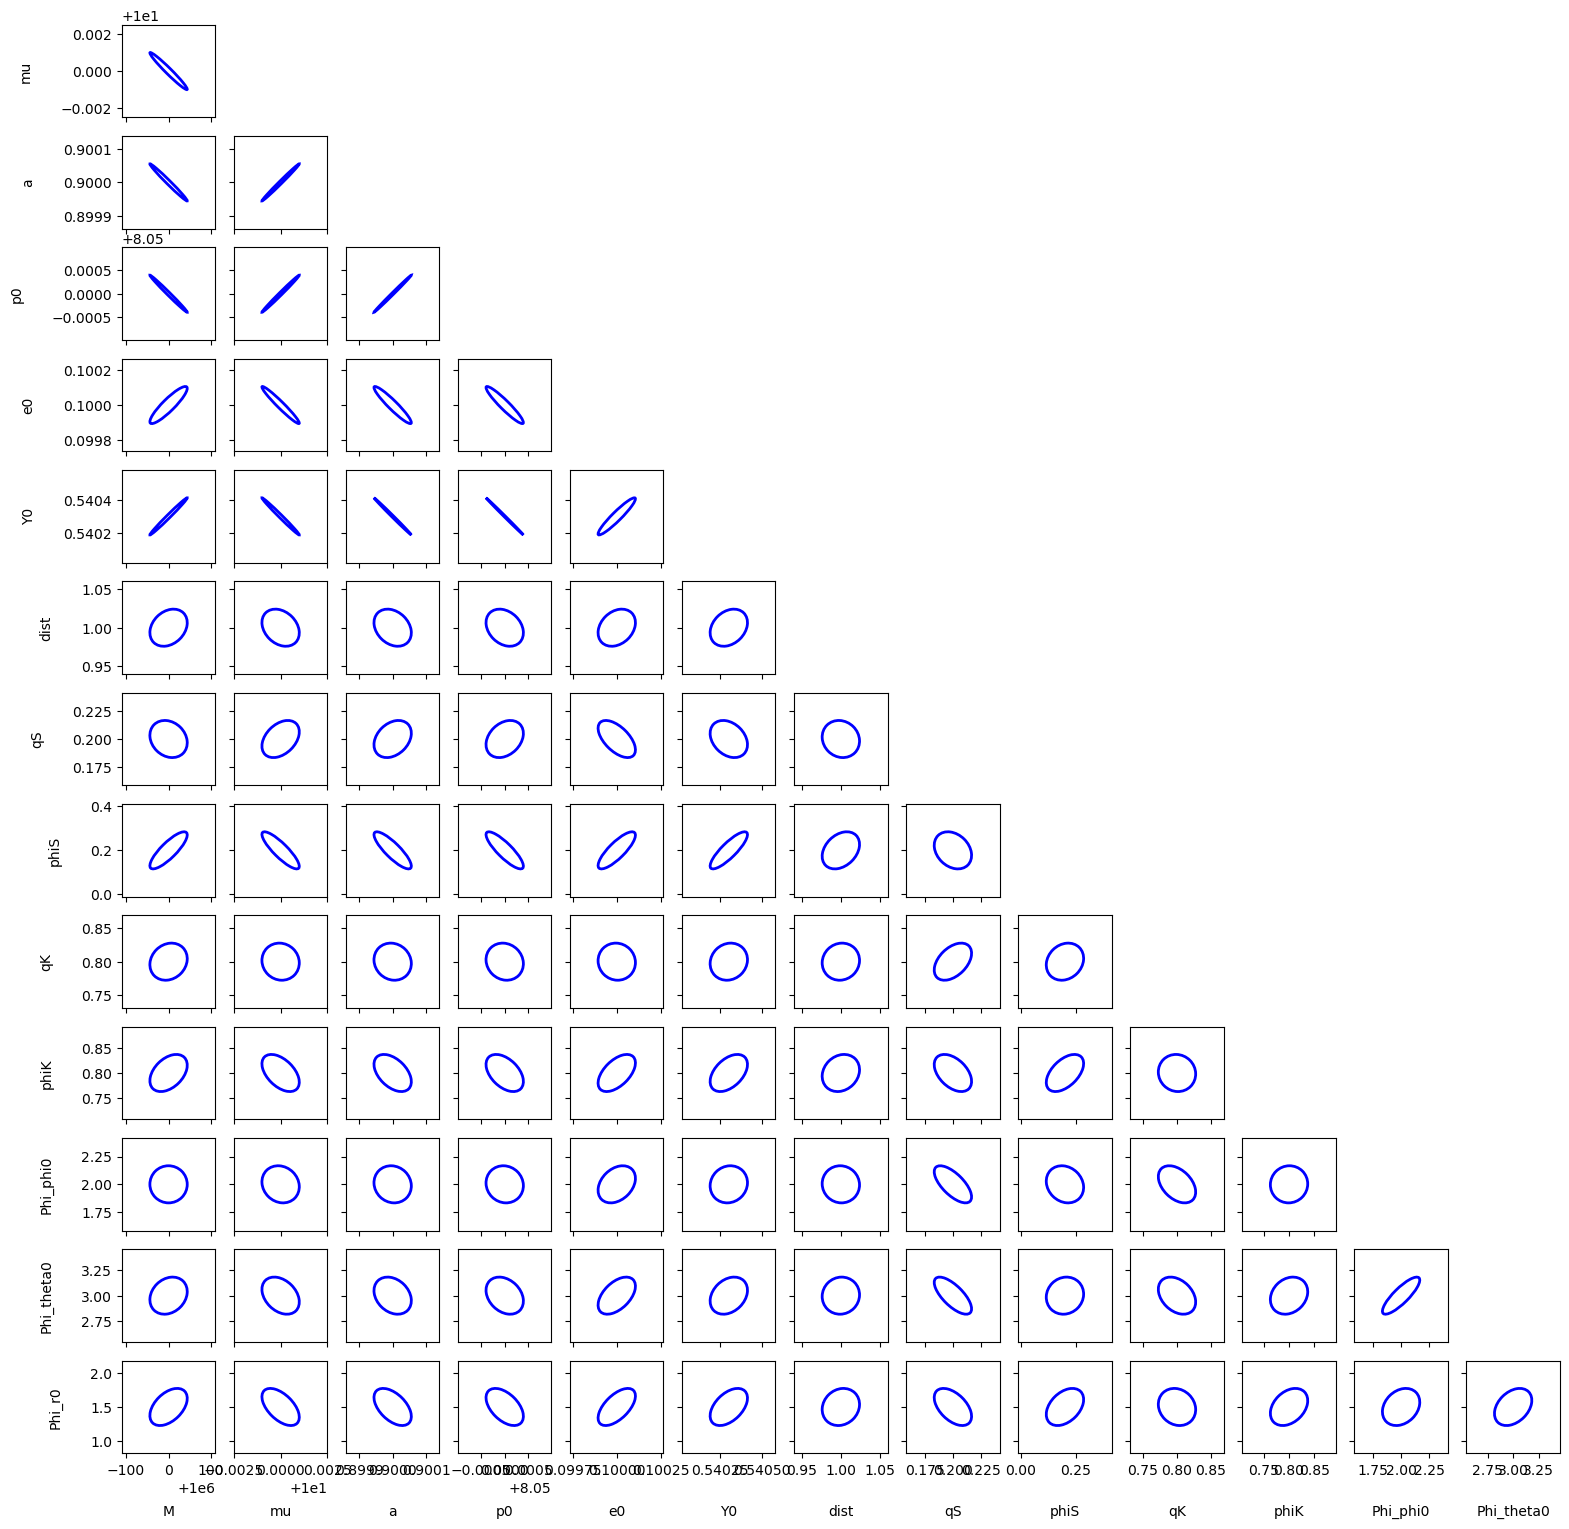

In [4]:
#initialization
fish = Fisher(M, mu, a, p0, e0, Y0, dist, qS, phiS, qK, phiK,
              Phi_phi0, Phi_theta0, Phi_r0, dt, T,
              filename='TestRun', CovMat=True, CovEllipse=True)

#execution
fish()